In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread 
%matplotlib inline
import numpy as np
from time import sleep
import cv2

In [3]:
data=pd.read_csv("DFUC2021_train/train.csv")
missing = data.isnull().sum()
missing

image           0
none         3994
infection    3994
ischaemia    3994
both         3994
dtype: int64

In [4]:
data


,image,none,infection,ischaemia,both
0,301000.jpg,1.0,0.0,0.0,0.0
1,301001.jpg,1.0,0.0,0.0,0.0
2,301002.jpg,0.0,1.0,0.0,0.0
3,301003.jpg,0.0,1.0,0.0,0.0
4,301004.jpg,0.0,1.0,0.0,0.0
...,...,...,...,...,...
9944,405006.jpg,NaN,NaN,NaN,NaN
9945,405007.jpg,NaN,NaN,NaN,NaN
9946,405008.jpg,NaN,NaN,NaN,NaN
9947,405009.jpg,NaN,NaN,NaN,NaN


In [5]:
img_name= data.iloc[:, 0]
img_name


0       301000.jpg
1       301001.jpg
2       301002.jpg
3       301003.jpg
4       301004.jpg
           ...    
9944    405006.jpg
9945    405007.jpg
9946    405008.jpg
9947    405009.jpg
9948    405010.jpg
Name: image, Length: 9949, dtype: object

In [6]:
imag=imread("DFUC2021_train/images/"+img_name[0])
imag

array([[[182, 128, 126],
        [182, 128, 126],
        [181, 127, 125],
        ...,
        [170, 102,  93],
        [171, 103,  94],
        [171, 103,  94]],

       [[180, 126, 124],
        [179, 125, 123],
        [178, 124, 122],
        ...,
        [170, 102,  93],
        [170, 102,  93],
        [171, 103,  94]],

       [[178, 124, 122],
        [177, 123, 121],
        [176, 122, 120],
        ...,
        [169, 101,  92],
        [169, 101,  92],
        [170, 102,  93]],

       ...,

       [[134,  76,  74],
        [134,  76,  74],
        [135,  77,  75],
        ...,
        [ 13,   6,  13],
        [ 13,   6,  13],
        [ 14,   7,  14]],

       [[135,  80,  77],
        [135,  80,  77],
        [135,  77,  75],
        ...,
        [ 13,   6,  13],
        [ 13,   6,  13],
        [ 13,   6,  13]],

       [[138,  83,  80],
        [137,  82,  79],
        [136,  78,  76],
        ...,
        [ 13,   6,  13],
        [ 13,   6,  13],
        [ 13,   6,  13]]

In [7]:
imag.shape

(224, 224, 3)

In [8]:
imag.size

150528

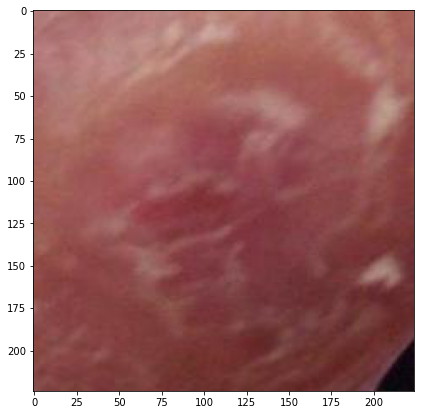

In [9]:
plt.figure(figsize=(7,7))
plt.imshow(imag)

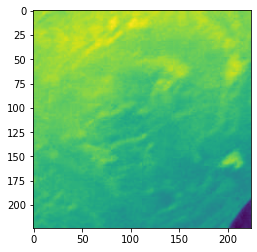

In [10]:
dimx=imag[:,:,0]
plt.imshow(dimx)

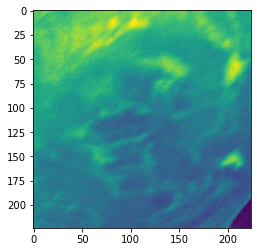

In [11]:
dimy=imag[:,:,1]
plt.imshow(dimy)

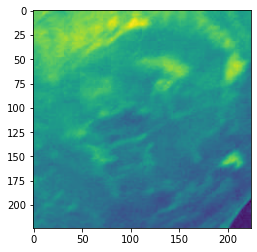

In [12]:
dimz=imag[:,:,2]
plt.imshow(dimz)

In [13]:
image=[]
for i in np.arange(len(img_name)):   
    image.append(imread("DFUC2021_train/images/"+img_name[i]))
image


[array([[[182, 128, 126],
         [182, 128, 126],
         [181, 127, 125],
         ...,
         [170, 102,  93],
         [171, 103,  94],
         [171, 103,  94]],
 
        [[180, 126, 124],
         [179, 125, 123],
         [178, 124, 122],
         ...,
         [170, 102,  93],
         [170, 102,  93],
         [171, 103,  94]],
 
        [[178, 124, 122],
         [177, 123, 121],
         [176, 122, 120],
         ...,
         [169, 101,  92],
         [169, 101,  92],
         [170, 102,  93]],
 
        ...,
 
        [[134,  76,  74],
         [134,  76,  74],
         [135,  77,  75],
         ...,
         [ 13,   6,  13],
         [ 13,   6,  13],
         [ 14,   7,  14]],
 
        [[135,  80,  77],
         [135,  80,  77],
         [135,  77,  75],
         ...,
         [ 13,   6,  13],
         [ 13,   6,  13],
         [ 13,   6,  13]],
 
        [[138,  83,  80],
         [137,  82,  79],
         [136,  78,  76],
         ...,
         [ 13,   6,  13],
  

In [14]:
data["images_array"]=image

In [15]:
data

,image,none,infection,ischaemia,both,images_array
0,301000.jpg,1.0,0.0,0.0,0.0,"[[[182, 128, 126], [182, 128, 126], [181, 127,..."
1,301001.jpg,1.0,0.0,0.0,0.0,"[[[93, 56, 38], [92, 55, 37], [93, 56, 38], [9..."
2,301002.jpg,0.0,1.0,0.0,0.0,"[[[107, 59, 71], [107, 59, 71], [107, 59, 71],..."
3,301003.jpg,0.0,1.0,0.0,0.0,"[[[124, 127, 120], [122, 123, 117], [120, 117,..."
4,301004.jpg,0.0,1.0,0.0,0.0,"[[[162, 103, 71], [162, 103, 71], [163, 102, 7..."
...,...,...,...,...,...,...
9944,405006.jpg,NaN,NaN,NaN,NaN,"[[[138, 112, 97], [138, 112, 97], [137, 111, 9..."
9945,405007.jpg,NaN,NaN,NaN,NaN,"[[[239, 183, 166], [239, 183, 166], [240, 184,..."
9946,405008.jpg,NaN,NaN,NaN,NaN,"[[[255, 229, 120], [255, 226, 118], [254, 223,..."
9947,405009.jpg,NaN,NaN,NaN,NaN,"[[[143, 143, 141], [143, 143, 141], [143, 143,..."


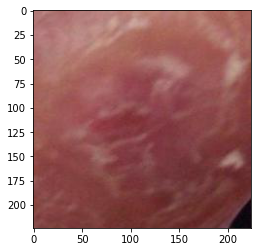

In [16]:
plt.imshow(data["images_array"][0])


In [17]:
height, width, layers = data["images_array"][0].shape
size=(width,height)
fps=1

out = cv2.VideoWriter('project.avi',cv2.VideoWriter_fourcc(*'DIVX'), fps, size)
 
for i in np.arange(len(data["images_array"])): 
    imag = cv2.cvtColor(data["images_array"][i], cv2.COLOR_BGR2RGB)
    out.write(imag)
cv2.destroyAllWindows()
out.release()